In [1]:
#UAE Used Cars Dataset Analysis 

In [5]:
#1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Load the dataset, Display all column names, summarising statistic 
df = pd.read_csv("uae_used_cars_10k.csv")
print("Column Names:", df.columns.tolist())
print(df.describe())

Column Names: ['Make', 'Model', 'Year', 'Price', 'Mileage', 'Body Type', 'Cylinders', 'Transmission', 'Fuel Type', 'Color', 'Location', 'Description']
               Year         Price        Mileage
count  10000.000000  1.000000e+04   10000.000000
mean    2014.472800  2.452345e+05  155161.871700
std        5.790839  4.709773e+05   83681.858983
min     2005.000000  7.183000e+03   10006.000000
25%     2009.000000  5.035250e+04   82904.000000
50%     2014.000000  1.027660e+05  154370.500000
75%     2019.000000  2.312480e+05  227551.250000
max     2024.000000  1.468698e+07  299996.000000


In [18]:
#2. Handling Missing Values in UAE Used Cars Dataset
print("Missing Values Before Cleaning:")
print(df.isnull().sum())
# Fill missing values in 'Cylinders' with mode (most frequent value)
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mode()[0])
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

Missing Values Before Cleaning:
Make              0
Model             0
Year              0
Price             0
Mileage           0
Body Type         0
Cylinders       105
Transmission      0
Fuel Type         0
Color             0
Location          0
Description       0
dtype: int64

Missing Values After Cleaning:
Make            0
Model           0
Year            0
Price           0
Mileage         0
Body Type       0
Cylinders       0
Transmission    0
Fuel Type       0
Color           0
Location        0
Description     0
dtype: int64


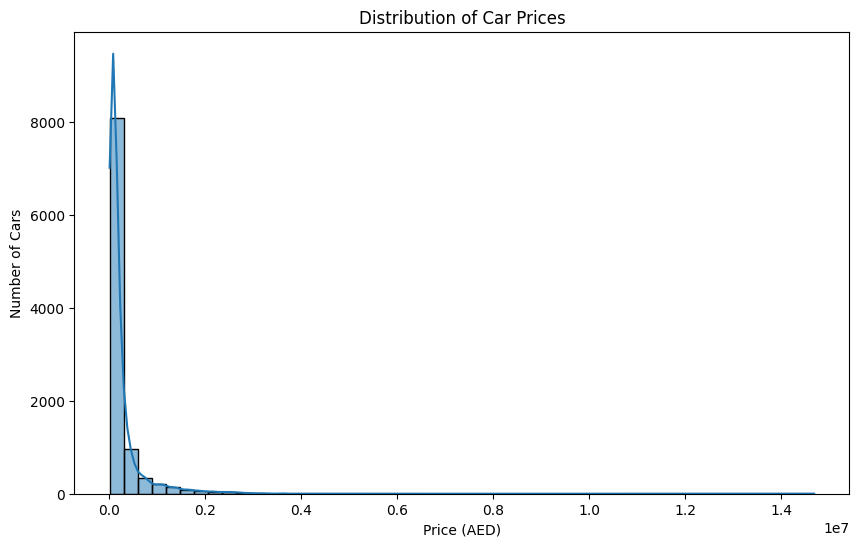

In [20]:
#3. now understandinig the patterns, trends, distributions, and relationships in the data and drawing insights.
#Visualize how car prices are spread
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (AED)")
plt.ylabel("Number of Cars")
plt.show()

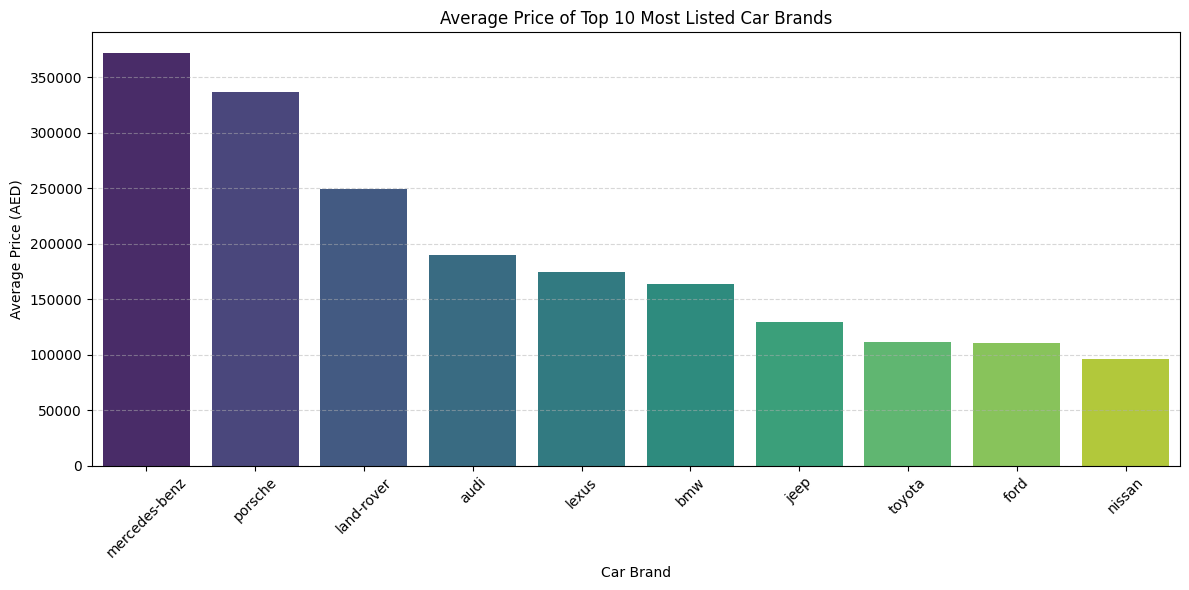

In [25]:
#4. Get top 10 most listed car brands
top_brands = df['Make'].value_counts().head(10).index

#Plotting bar graph with modern Seaborn style
plt.figure(figsize=(12,6))
sns.barplot(data=brand_avg_price, x='Make', y='Price', hue='Make', palette='viridis')

plt.title("Average Price of Top 10 Most Listed Car Brands")
plt.ylabel("Average Price (AED)")
plt.xlabel("Car Brand")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


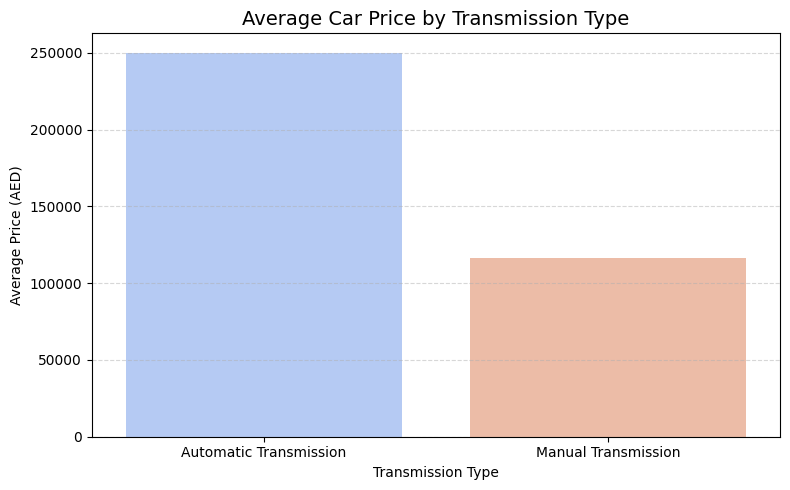

In [27]:
#5.  Explore the Relationship Between Transmission Type and Average Car Price
# Group the data by Transmission type and calculate average price
trans_price = df.groupby('Transmission', as_index=False)['Price'].mean().sort_values(by='Price', ascending=False)

# Plotting the comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=trans_price, x='Transmission', y='Price', palette='coolwarm', hue='Transmission', legend=False)

# Titles and labels
plt.title('Average Car Price by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type')
plt.ylabel('Average Price (AED)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


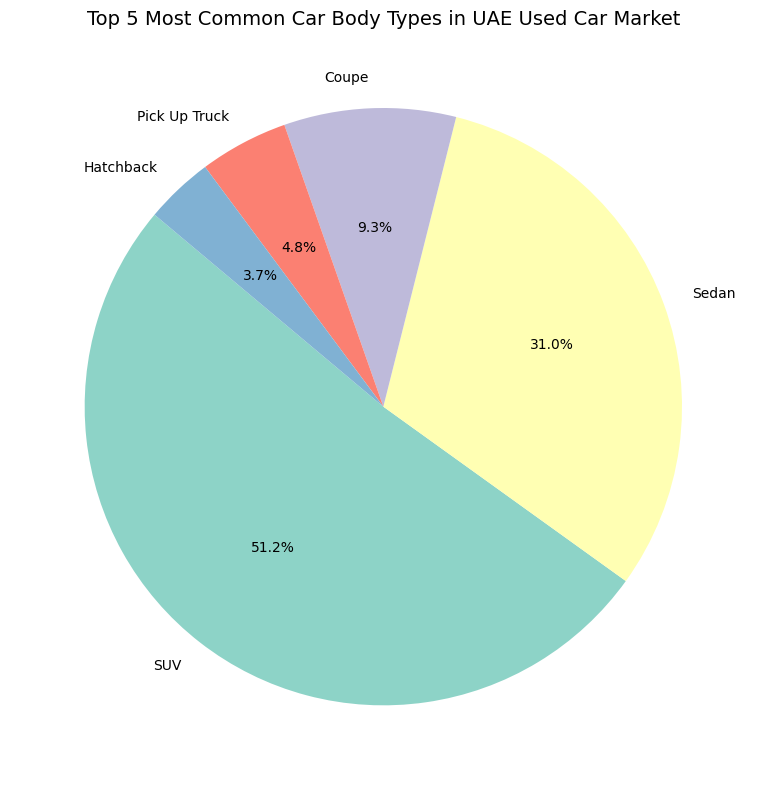

In [30]:
#6. Visualization: Pie Chart for Body Type Distribution

# Get top 5 body types
top_bodies = df['Body Type'].value_counts().nlargest(5)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_bodies.values,
        labels=top_bodies.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set3'))

# Add a title
plt.title('Top 5 Most Common Car Body Types in UAE Used Car Market', fontsize=14)
plt.tight_layout()
plt.show()

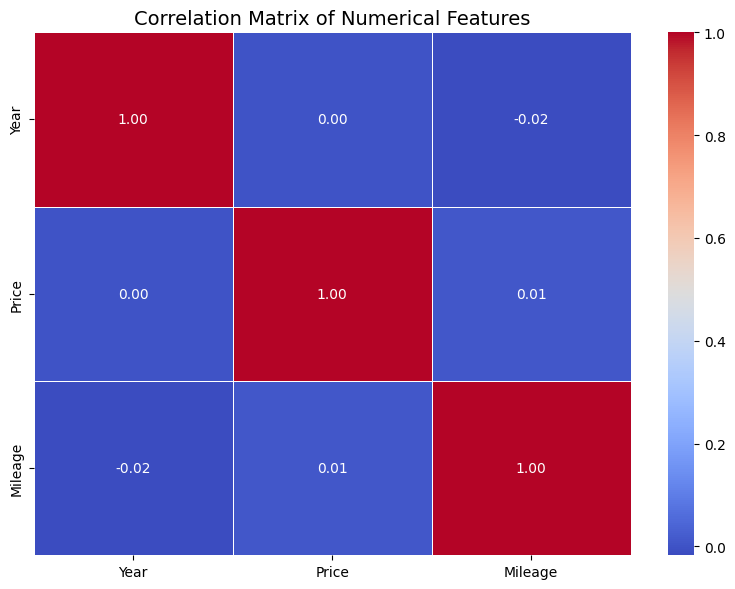

In [31]:
#7 Visualization: Heatmap of Correlation Between Numerical Features
# Select numerical columns
num_cols = ['Year', 'Price', 'Mileage']

# Check if 'Cylinders' is numeric
if df['Cylinders'].dtype != 'object':
    num_cols.append('Cylinders')

# Create a correlation matrix
corr_matrix = df[num_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title and layout
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

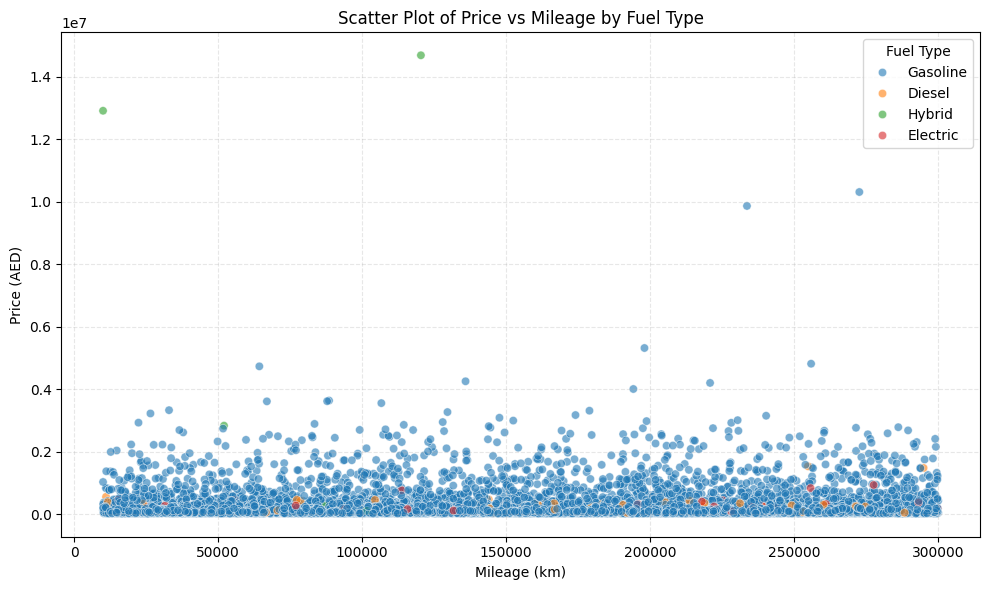

In [32]:
#8 plotting scatter plot to define the Relationship Between Mileage and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Fuel Type', alpha=0.6)

plt.title('Scatter Plot of Price vs Mileage by Fuel Type')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (AED)')
plt.legend(title='Fuel Type')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

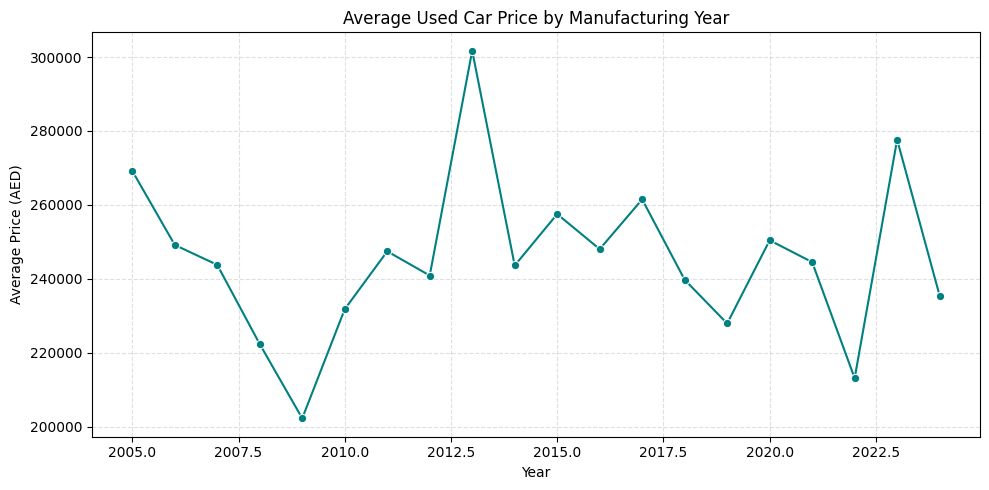

In [33]:
#9 plotting line plot to define the Average Price Trend Over Car Manufacturing Years

# Group by year and get average price
yearly_avg_price = df.groupby('Year')['Price'].mean().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_avg_price.index, y=yearly_avg_price.values, marker='o', color='teal')

# Styling
plt.title('Average Used Car Price by Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Average Price (AED)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
#10 boxplot  to define 